In [1]:
import os

import numpy as np

import pandas as pd

from scipy.interpolate import interp1d
from scipy.integrate import simps as integrate

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data_dir = 'data'
wave_range = np.arange(300, 900, 1)

# Read in data files, interpolate to the given wave range and store
throughput_data = {}
for filename in sorted(os.listdir(data_dir)):
    if not filename.endswith('.data'):
        continue
    key = filename.split('.')[0]
    data = pd.read_csv(os.path.join(data_dir, filename), names=['wave', 'throughput'], index_col=0, comment='#', sep=' ')
    data_interp = interp1d(data.index, data.throughput, bounds_error=False, fill_value='extrapolate')(wave_range)
    throughput_data[key] = data_interp

# Make into a dataframe
throughput_data = pd.DataFrame(data=throughput_data, index=wave_range)

# Save all data as a CSV
throughput_data.to_csv(os.path.join(data_dir, 'throughput.csv'))
throughput_data

,GOTO_B,GOTO_B_noatm,GOTO_G,GOTO_G_noatm,GOTO_L,GOTO_L_noatm,GOTO_R,GOTO_R_noatm,atm,atmosphere,...,filter_L,filter_R,lens1,lens2,lens3,lens_coating,mirror,ota,qe,window
300,-2.616174e-16,-7.729727e-15,1.781692e-15,5.264173e-14,1.479952e-15,4.372654e-14,2.668656e-15,7.884789e-14,0.033846,-3.265813,...,2.580503e-06,4.653175e-06,0.000892,0.053618,0.078400,0.9132,0.286719,8.069032e-08,0.21000,0.660000
301,-1.949432e-14,-4.231770e-13,1.559973e-15,3.386344e-14,-5.593580e-16,-1.214238e-14,2.990442e-14,6.491565e-13,0.046067,-3.264591,...,-5.461003e-08,2.919563e-06,0.005571,0.076395,0.096570,0.9140,0.291552,1.048807e-06,0.21200,0.650920
302,-9.912408e-14,-1.662489e-12,-1.837179e-14,-3.081279e-13,-4.711620e-14,-7.902233e-13,-2.999149e-15,-5.030111e-14,0.059624,-3.263369,...,-1.108512e-06,-7.056153e-08,0.010250,0.099173,0.114740,0.9148,0.296385,3.331162e-06,0.21400,0.641840
303,-1.559025e-13,-1.916917e-12,-5.782444e-15,-7.109868e-14,8.995996e-15,1.106113e-13,2.599513e-13,3.196260e-12,0.081330,-3.262147,...,6.819064e-08,1.970460e-06,0.014929,0.121950,0.132910,0.9156,0.301217,7.509670e-06,0.21600,0.632760
304,-4.880087e-13,-5.151197e-12,-3.673775e-13,-3.877870e-12,2.487898e-13,2.626112e-12,-2.200160e-13,-2.322388e-12,0.094737,-3.260925,...,8.477590e-07,-7.497111e-07,0.019608,0.144727,0.151080,0.9164,0.306050,1.420968e-05,0.21800,0.623680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2.397583e-04,2.501041e-04,2.085785e-04,2.175789e-04,-4.365455e-06,-4.553828e-06,1.573194e-04,1.641078e-04,0.958634,-2.538666,...,-4.166387e-05,1.501455e-03,0.976263,0.990040,0.994109,0.9839,0.868552,6.476990e-01,0.16875,0.989016
896,2.145169e-04,2.272224e-04,2.062435e-04,2.184589e-04,-1.159004e-05,-1.227650e-05,1.257455e-04,1.331932e-04,0.944084,-2.537444,...,-1.136729e-04,1.233288e-03,0.976263,0.990040,0.994089,0.9838,0.868160,6.466972e-01,0.16700,0.988981
897,1.704538e-04,1.855614e-04,2.279220e-04,2.481231e-04,8.810633e-06,9.591533e-06,1.218686e-04,1.326701e-04,0.918584,-2.536222,...,8.989137e-05,1.243377e-03,0.976263,0.990040,0.994069,0.9837,0.867769,6.456967e-01,0.16525,0.988946
898,2.461113e-04,2.641734e-04,2.126483e-04,2.282545e-04,7.890296e-06,8.469362e-06,1.087504e-04,1.167316e-04,0.931628,-2.535000,...,8.034836e-05,1.107426e-03,0.976263,0.990040,0.994049,0.9836,0.867377,6.446974e-01,0.16350,0.988910


Plot the combination of all OTA elements (without a filter)

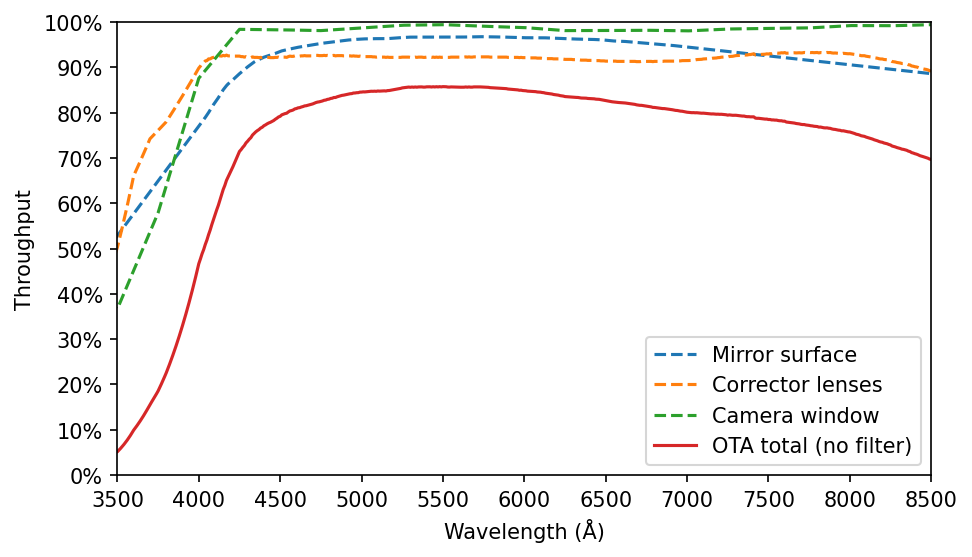

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=150)

ax.plot(wave_range, throughput_data['mirror'], label='Mirror surface', ls='dashed', color='tab:blue')
ax.plot(wave_range, throughput_data['corrector'], label='Corrector lenses', ls='dashed', color='tab:orange')
ax.plot(wave_range, throughput_data['window'], label='Camera window', ls='dashed', color='tab:green')
ax.plot(wave_range, throughput_data['ota'], label='OTA total (no filter)', color='tab:red')

ax.set_xlabel('Wavelength (Å)')
ax.set_xlim(350, 850)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y*10)))

ax.set_ylabel('Throughput')
ax.set_ylim([0, 1])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.FuncFormatter('{0:.0%}'.format))

ax.legend(loc='lower right')

plt.show()

Plot the complete throughput model for all 4 filters (no atmosphere)

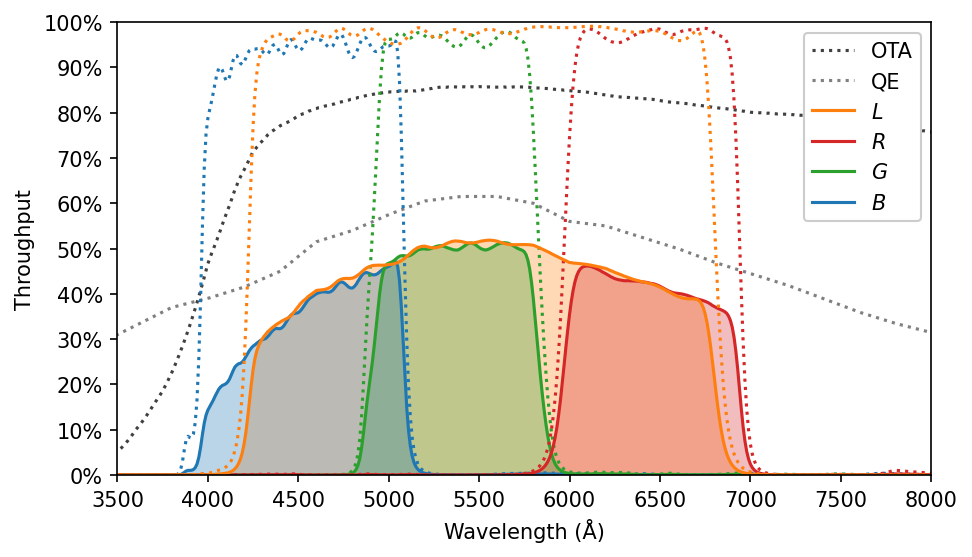

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=150)

ax.plot(throughput_data.index, throughput_data['ota'], ls='dotted', c='0.25', label='OTA')
ax.plot(throughput_data.index, throughput_data['qe'], ls='dotted', c='0.50', label='QE')

ax.plot(throughput_data.index, throughput_data['filter_L'], ls='dotted', zorder=2.5, c='tab:orange')
ax.plot(throughput_data.index, throughput_data['filter_R'], ls='dotted', zorder=2.4, c='tab:red')
ax.plot(throughput_data.index, throughput_data['filter_G'], ls='dotted', zorder=2.3, c='tab:green')
ax.plot(throughput_data.index, throughput_data['filter_B'], ls='dotted', zorder=2.2, c='tab:blue')

ax.fill_between(throughput_data.index, 0, throughput_data['GOTO_L_noatm'], ec='none', alpha=0.3, fc='tab:orange')
ax.fill_between(throughput_data.index, 0, throughput_data['GOTO_R_noatm'], ec='none', alpha=0.3, fc='tab:red')
ax.fill_between(throughput_data.index, 0, throughput_data['GOTO_G_noatm'], ec='none', alpha=0.3, fc='tab:green')
ax.fill_between(throughput_data.index, 0, throughput_data['GOTO_B_noatm'], ec='none', alpha=0.3, fc='tab:blue')

ax.plot(throughput_data.index, throughput_data['GOTO_L_noatm'], label=r'$\it{L}$', zorder=2.5, c='tab:orange')
ax.plot(throughput_data.index, throughput_data['GOTO_R_noatm'], label=r'$\it{R}$', zorder=2.4, c='tab:red')
ax.plot(throughput_data.index, throughput_data['GOTO_G_noatm'], label=r'$\it{G}$', zorder=2.3, c='tab:green')
ax.plot(throughput_data.index, throughput_data['GOTO_B_noatm'], label=r'$\it{B}$', zorder=2.2, c='tab:blue')

ax.set_xlabel('Wavelength (Å)')
ax.set_xlim(350, 800)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y*10)))

ax.set_ylabel('Throughput')
ax.set_ylim([0, 1])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.FuncFormatter('{0:.0%}'.format))

ax.legend(loc='upper right', framealpha=1)

plt.savefig('throughput.png')
plt.show()

Print key properties for each filter in Markdown table format

In [5]:
print('| Filter | Midpoint | Bandwidth | Throughput (no atm) | Throughput (at zenith) | Extinction coefficient |')
print('| - | - | - | - | - | - |')

for filt in ['L', 'R', 'G', 'B']:
    print('', end = '|')

    print(f' GOTO {filt} ', end = '|')
    
    pivot_wavelength = np.sqrt(integrate(x=wave_range, y=throughput_data[f'filter_{filt}']*wave_range) / integrate(x=wave_range, y=throughput_data[f'filter_{filt}']/wave_range))
    print(f' {pivot_wavelength*10:>4.0f} Å ', end = '|')
          
    effective_bandwidth = integrate(x=wave_range, y=throughput_data[f'filter_{filt}'])
    print(f' {effective_bandwidth*10:>4.0f} Å ', end = '|')
    
    throughput_noatm =  integrate(throughput_data[f'GOTO_{filt}_noatm'], wave_range) / integrate(throughput_data[f'filter_{filt}'], wave_range)
    print(f' {throughput_noatm:.4f} e-/ph ', end = '|')
    
    throughput_atm =  integrate(throughput_data[f'GOTO_{filt}'], wave_range) / integrate(throughput_data[f'filter_{filt}'], wave_range)
    print(f' {throughput_atm:.4f} e-/ph ', end = '|')
    
    extinction = throughput_atm / throughput_noatm
    print(f' {-2.5*np.log10(extinction):.3f} mag ', end = '|')
    
    print()

| Filter | Midpoint | Bandwidth | Throughput (no atm) | Throughput (at zenith) | Extinction coefficient |
| - | - | - | - | - | - |
| GOTO L | 5469 Å | 2536 Å | 0.4546 e-/ph | 0.3987 e-/ph | 0.143 mag |
| GOTO R | 6449 Å |  963 Å | 0.4261 e-/ph | 0.3892 e-/ph | 0.098 mag |
| GOTO G | 5371 Å |  911 Å | 0.5112 e-/ph | 0.4477 e-/ph | 0.144 mag |
| GOTO B | 4532 Å | 1066 Å | 0.3711 e-/ph | 0.3053 e-/ph | 0.212 mag |
